## CART(Classification And Regression Tree)

-예측 및 분류 문제를 Tree로 문제 풀 수 있음.
- Tree가 많아질수록 Overfitting 초래(= high variance, low bias)

- CART 알고리즘은 지니 지수(Gini Index) 또는 분산의 감소량을 사용하여 나무의 가지를 이진(Binary) 분리한다. (범주형 변수에 대해서는 지니 지수를 사용하고, 연속형 변수에 대해서는 분산의 감소량을 사용한다.)
참고자료 : 사례로 배우는 데이터마이닝 [자유아카데미, 최종후/소선하] p.28





| 알고리즘 | 평가지수(선택방법) | 비고 |
|:---:|:----:|:----|
| ID3 | Entropy | 다지분리(범주) |
| C4.5 | Information Gain | 다지분리(범주) 및 이진분리(수치) |
| C5.0 | 카이제곱(범주), F검정(수치) | 통계적 접근 방식
| CART | Gini index(범주), 분산의 차이(수치) |통계적 접근 방식, 항상 2진 분리|

**알고리즘 차이 참고(*https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)**


#랜덤 포레스트(Random Forest)

- 오늘날 쓰이는 머신 러닝 알고리즘 중에서 **가장 강력한 성능을 자랑하는 알고리즘**

- 랜덤 포레스트는 이 중 **배깅 방법**을 적용한 결정트리(Dicison Tree)의 앙상블

- 랜덤 포레스트 알고리즘은 **결정트리(Dicision Tree) 분류기 여러 개를 훈련**시켜서 그 결과들을 가지고 예측을 함. 각각의 결정트리를 훈련시킬 때 배깅(Bagging). 즉, 훈련 세트에서 중복을 허용하여 샘플링한 데이터셋을 개별 결정트리 분류기의 훈련 세트로 하여 훈련시키는 방식.


#### 장점 :
1. 분류, 회귀에서 가장 널리 쓰이는 알고리즘으로 성능이 좋고 정확도가 높다
2. 간편하고 빠르다.
3. 큰 데이터 셋에서도 잘 사용되며, 많은 입력 변수들을 다룰 수 있다.

#### 단점 : 
1. 속도와 메모리 비용이 상대적(linear에 비해)으로 큼
(더 많은 트리 -> 정확도는 높아지나 시간과 리소스 소모가 큼)

2. 트리 깊이와 개수 설정을 잘못하여 과적합(Overfiting)발생.




#### 랜덤 포레스튼튼 훈련을 통해 구성해 놓은 다수의 의사결정트리들로부터 분류 결과를 취합해서 예측하는 앙상블 모델이라고 할 수 있음.

<figure>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdQRp2AYzLvDCg88pi6c2CRYQ_6qNBGVDn7A&usqp=CAU' width=700 height=300>
</figure>



##코드 실습
참고 : 파이썬 완벽가이드


##### 배깅(Bagging)

- 통계학에서 중복한 허용한 리샘플링(resampling)을 부트스트래핑(boostraping)이라 하고 이와 반대로 중복을 허용하지 않는 샘플링 방식을 페이스팅(pasting)이라고 함.



ex) 10만개의 데이터 중 7만 5천개의 데이터를 학습데이터로 사용한다고 가정하면

7만 5천개의 데이터를 가지고 여러 데이터 셋으로 나눈다면 학습데이터가 부족해지고 이로인해 모형들이 편향히 생기거나 분산이 커지는 문제가 생길 수 있다.

하지만 배깅의 경우는 복원추출(Resampling)을 하기 때문에 어떤 데이터는 여러번 뽑힐 수 있고 어떤 데이터는 한번도 뽑히지 않을 수도 있다 때문에 75000개의 데이터를 가지고 75000번을 추출해도 75000가지의 서로 다른 샘플데이터를 추출할 수 있게 됨.

이 특성을 이용해 조금씩 다른 모델들을 만들고 그것들의 결과를 취합하는 것이다.

데이터가 비슷하니 결과도 별 차이가 없다고 생각할 수 있지만 데이터가 빼곡해지는 효과가 있고, 조금씩 다른 모델들이 투표를 하는 방식으므로 배깅으로 만들어진 앙상블 모델은 결과들에 대한 편차가 크지 않고 안정적인 결과를 보여지도록 향상됨.

학습데이터가 원래 편향이 있다면 그로 인한 편향문제까지는 해결하지 못하지만 미지의 데이터(Unseen data)에 상당히 괜찮은 성능을 보이고 노이즈나 아웃라이어에 대해서도 강해지는 것으로 알려져 있음.



<figure>
    <img src='https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png' width=700 height=300>
</figure>

출처 : https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

- 이 의사결정나무들은 모두 같은 의사결정나무일 수가 없다

- Bootstrap으로 샘플을 추출했기 때문에, 어느 정도의 중복과 함께 각기 다른 샘플로 의사 결정나무 모델을 만들었다고 할 수 있다.


##  Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

 - n_estimators는 클수록 좋습니다.
 - 결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오겠죠.
 - 하지만 그만큼 메모리와 훈련 시간이 증가합니다.
Default는 10입니다.
 - max_features: 무작위로 선택할 Feature의 개수

-  max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리를 만듭니다.
단, bootstrap=True이면 30개의 feature에서 복원 추출로 30개를 뽑습니다.
-  특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 그대로인 것입니다.
-  bootstrap=True는 default 값입니다.
-  따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것입니다.
-  max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 달라질 것입니다. 따라서 오버피팅이 줄어들 것입니다.
-  max_features는 일반적으로 Defalut 값을 씁니다.
-  max_depth : 트리의 깊이를 뜻합니다.

-  min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수 입니다.

-  min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 입니다.

-  max_leaf_nodes : 리프노드의 최대 개수

In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=6d7bdb90636de5a7e46d0d8e8b2720d31aa9936f46a6363e03743afcc4876a32
  Stored in directory: /root/.cache/pip/wheels/11/33/5e/10b9333a84e80e0c099acf23ccc525e2607ecad167aa881be9
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

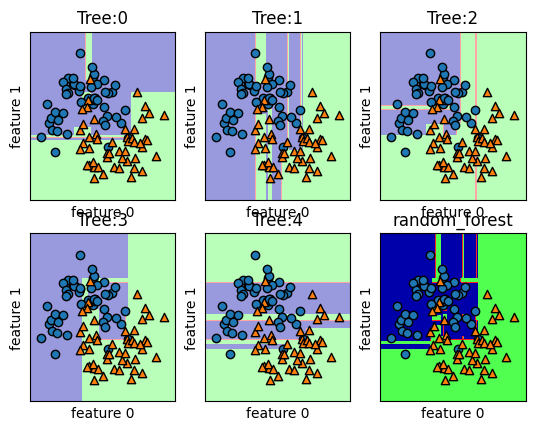

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons # 가상의데이터
from sklearn.model_selection import train_test_split

x,y=make_moons(n_samples=100, noise=0.25, random_state=42)
# noise : Standard deviation of gaussian noise added to the data

X_train, X_test, y_train, y_test=train_test_split(x,y, stratify=y, random_state=42)

forest=RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42)
# n_estimators:사용할 tree수/ n_jobs:가용되는 cpu 갯수(-1이면 모두 사용해주세요)
forest.fit(X_train,y_train)

import matplotlib.pyplot as plt
import numpy as np
from mglearn.plots import plot_2d_classification

_, axes=plt.subplots(2,3) # 2행 3열
marker_set=['o','^'] # o 모양, ^ 모양
# axs.revel():축을 평평하게 펴주세요 forest.estimater_:예측된라벨
for i,(axe,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    axe.set_title('Tree:{}'.format(i))

    plot_2d_classification(tree,x,fill=True, ax=axe, alpha=0.4) # plot_2d_classificiation으로 그려주세요

    for i,m in zip(np.unique(y), marker_set): # np.unique:중복을 제거 marker_set를 기준으로

        axe.scatter(x[y==i][:,0], x[y==i][:,1], marker=m, label='class{}'.format(i), edgecolors='k')
        axe.set_xlabel('feature 0')
        axe.set_ylabel('feature 1')

axes[-1,-1].set_title('random_forest')
axes[-1,-1].set_xlabel('feature 0')
axes[-1,-1].set_ylabel('feature 1')
plot_2d_classification(forest,x,fill=True, ax=axes[-1,-1], alpha=1)
for i,m in zip(np.unique(y), marker_set):
    plt.scatter(x[y==i][:,0], x[y==i][:,1], marker=m, label='class{}'.format(i), edgecolors='k')
plt.show()


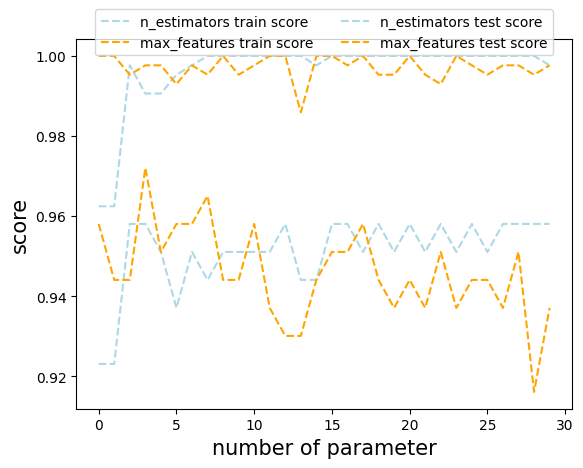

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target,
                                                  stratify=cancer.target,
                                                  random_state=42)
n_features=cancer.data.shape[1]

score_n_tr_est=[]
score_n_te_est=[]
score_m_tr_mft=[]
score_m_te_mft=[]

for i in np.arange(1,n_features+1):
# n_estimators와 max_feature는 모두 0보다 큰 정수여야하므로 1부터 시작
    params_n={'n_estimators':i, 'max_features':'auto', 'n_jobs':1} # **kwargs parameter
    params_m={'n_estimators':10, 'max_features':i,'n_jobs':-1}
    forest_n = RandomForestClassifier(**params_n).fit(X_train,y_train)
    forest_m = RandomForestClassifier(**params_m).fit(X_train,y_train)

    score_n_tr=forest_n.score(X_train, y_train)
    score_n_te=forest_n.score(X_test, y_test)  
    score_m_tr=forest_m.score(X_train, y_train)
    score_m_te=forest_m.score(X_test, y_test)

    score_n_tr_est.append(score_n_tr)
    score_n_te_est.append(score_n_te)
    score_m_tr_mft.append(score_m_tr)
    score_m_te_mft.append(score_m_te)
index=np.arange(len(score_n_tr_est))
plt.plot(index, score_n_tr_est, label='n_estimators train score',color='lightblue',ls='--') #ls:linestyle
plt.plot(index, score_m_tr_mft, label='max_features train score', color='orange', ls='--')
plt.plot(index, score_n_te_est, label='n_estimators test score', color='lightblue', ls='--')
plt.plot(index, score_m_te_mft, label='max_features test score', color='orange', ls='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.1),ncol=2, fancybox=True, shadow=False)
# fancybox:박스모양, shadow:그림자
plt.xlabel('number of parameter', size=15)
plt.ylabel('score',size=15)
plt.show()

- 시각화 

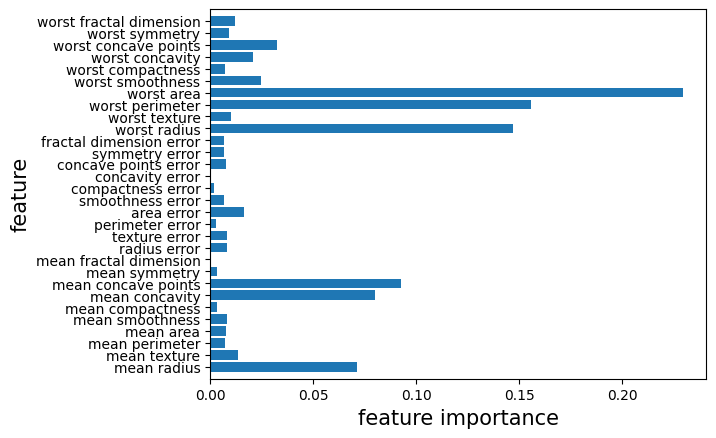

In [ ]:
n_features=cancer.data.shape[1]

index=np.arange(n_features)

forest=RandomForestClassifier(n_estimators=10, n_jobs=-1)
forest.fit(X_train, y_train)
plt.barh(index,forest.feature_importances_, align='center') # plt.ploth:Horizontal bar graph
plt.yticks(index,cancer.feature_names)
plt.ylim(-1,n_features)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature',size=15)
plt.show()